In [271]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"


In [272]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [273]:
dataset = pd.read_csv("heart.csv")
dataset.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [274]:
dataset.dtypes


age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [275]:
X = dataset.iloc[:, :-1]
X.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [276]:
y = dataset.iloc[:, [-1]]
y.head()


,target
0,1
1,1
2,1
3,1
4,1


In [277]:
X_ohe = pd.get_dummies(X, columns=["cp", "restecg", "slope", "thal"])


In [278]:
X_ohe.columns


Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'ca', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'restecg_0', 'restecg_1',
       'restecg_2', 'slope_0', 'slope_1', 'slope_2', 'thal_0', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')

In [279]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_ohe, y, test_size=0.3, random_state=0
)


In [280]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


In [281]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score


In [282]:
def build_classifier():
    classifier = Sequential()
    classifier.add(keras.Input(shape=(23,)))
    classifier.add(Dense(11, activation="relu"))
    classifier.add(Dropout(0.1))
    classifier.add(Dense(11, activation="relu"))
    classifier.add(Dropout(0.1))
    classifier.add(Dense(1, activation="sigmoid"))
    classifier.compile(
        optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"]
    )
    return classifier


In [283]:
classifier = KerasClassifier(build_fn=build_classifier, epochs=70, batch_size=10)
accuracies = cross_val_score(
    estimator=classifier, X=X_train, y=y_train, cv=5, n_jobs=-1
)

mean = accuracies.mean()
variance = accuracies.std()
print(mean)
print(variance)


0.8301218161683277
0.045915068951849186


In [284]:
classifier.fit(X_train, y_train)



C:\Users\ishaa\AppData\Local\Programs\Python\Python39\lib\site-packages\scikeras\wrappers.py:289: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


Epoch 1/70
22/22 [==============================] - 0s 619us/step - loss: 0.7504 - accuracy: 0.4811
Epoch 2/70
22/22 [==============================] - 0s 667us/step - loss: 0.6587 - accuracy: 0.6557
Epoch 3/70
22/22 [==============================] - 0s 572us/step - loss: 0.6255 - accuracy: 0.6462
Epoch 4/70
22/22 [==============================] - 0s 572us/step - loss: 0.5763 - accuracy: 0.7358
Epoch 5/70
22/22 [==============================] - 0s 572us/step - loss: 0.5282 - accuracy: 0.7689
Epoch 6/70
22/22 [==============================] - 0s 572us/step - loss: 0.5023 - accuracy: 0.8066
Epoch 7/70
22/22 [==============================] - 0s 619us/step - loss: 0.4728 - accuracy: 0.7972
Epoch 8/70
22/22 [==============================] - 0s 619us/step - loss: 0.4664 - accuracy: 0.8066
Epoch 9/70
22/22 [==============================] - 0s 619us/step - loss: 0.4308 - accuracy: 0.8349
Epoch 10/70
22/22 [==============================] - 0s 572us/step - loss: 0.4104 - accuracy: 0.8443

KerasClassifier(
	model=None
	build_fn=<function build_classifier at 0x000001DC2EF2BA60>
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=10
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=70
	class_weight=None
)

In [285]:
y_pred = classifier.predict(X_test)
y_pred = y_pred > 0.5


10/10 [==============================] - 0s 445us/step


10/10 [==============================] - 0s 556us/step


C:\Users\ishaa\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


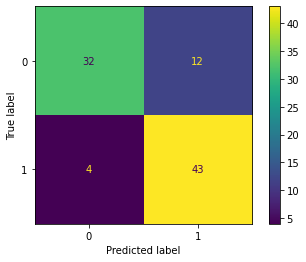

In [286]:
from sklearn.metrics import plot_confusion_matrix, accuracy_score

plot_confusion_matrix(classifier, X_test, y_test)
plt.show()


In [287]:
acc = accuracy_score(y_test, y_pred) * 100


In [288]:
acc


82.41758241758241